In [1]:
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
def AnalyseGEN(plot_name, files, expected_results, iterations=10,
               populationSize=10, mutationProbability = 0.05, crossesPerGeneration=50,
                drawPlot = True):
    # SYMULOWANE WYŻARZANIE
    actual_results = []
    error = []
    
    index = 0
    for f in files:
        print("starting", f)
        
        p1 = subprocess.Popen(
            ["../Debug/PEA_Projekt.exe",
             "GEN",
             "../Debug/Data/"+f+".txt",
             str(iterations),
             str(populationSize),
             str(mutationProbability),
             str(crossesPerGeneration),
             str(0)],
            stdout=subprocess.PIPE)
        
        text_result = p1.communicate()[0].strip()
        print(text_result)
        single_result = float(text_result)
        actual_results.append(single_result)
        
        index+=1
        
    errors = [(abs(expected_results[x] - actual_results[x])) / expected_results[x] * 100
                   for x in range(len(actual_results))]
    
    avgError = sum(errors) / len(errors)
    
    resultTable = pd.DataFrame(
        {'baseFile' : files,
         'actual_results': actual_results,
         'expected_results': expected_results,
         'error': errors
        })
    
    if drawPlot:
        plt.rcParams['figure.figsize'] = [20, 5]
        fig, axes = plt.subplots()

        ind = np.arange(len(expected_results))
        width = 0.4   

        plt.bar(ind, expected_results, width, label='Wartosci globalnie minimalne')
        plt.bar(ind + width, actual_results, width,
            label='Wartosci obliczone przez algorytm')

        plt.ylabel('Wagi scieżek')
        plt.title(plot_name)

        plt.xticks(ind + width / 2, files)
        plt.legend(loc='best')

        plt.show()
    
    print(avgError)
    
    return (resultTable, avgError)

In [3]:
files = ["TSP/data17", "TSP/data21", "TSP/data24", "TSP/data26", "TSP/data29", "TSP/data42", "TSP/data58", "TSP/data120"]
expected_results = [2085, 2707, 1272, 937, 1610, 699, 25395, 6942]

iterations_of_dependency_check = 15

starting TSP/data26
b'1313'
40.128068303094985
starting TSP/data26
b'1225'
30.73639274279616
starting TSP/data26
b'1193'
27.321237993596586
starting TSP/data26
b'1104'
17.822838847385274
starting TSP/data26
b'1060'
13.127001067235858
starting TSP/data26
b'1068'
13.980789754535753
starting TSP/data26
b'1090'
16.328708644610458
starting TSP/data26
b'1116'
19.103521878335112
starting TSP/data26
b'955'
1.92102454642476
starting TSP/data26
b'1118'
19.316969050160086
starting TSP/data26
b'1053'
12.379935965848453
starting TSP/data26
b'988'
5.44290288153682
starting TSP/data26
b'990'
5.656350053361793
starting TSP/data26
b'1055'
12.593383137673426
starting TSP/data26
b'980'
4.5891141942369265
[40.128068303094985, 30.73639274279616, 27.321237993596586, 17.822838847385274, 13.127001067235858, 13.980789754535753, 16.328708644610458, 19.103521878335112, 1.92102454642476, 19.316969050160086, 12.379935965848453, 5.44290288153682, 5.656350053361793, 12.593383137673426, 4.5891141942369265]


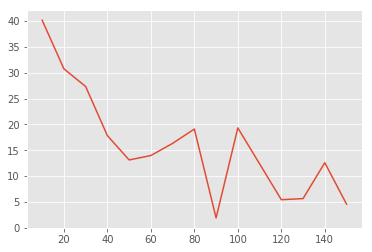

In [4]:
# Wpływ zwiększania populacji
avg_errs = []
values_used = []
for i in range(iterations_of_dependency_check):
    value_used = (i+1)*10
    values_used.append(value_used)
    avg_errs.append(
        AnalyseGEN("Algorytm genetyczny", [files[3]], [expected_results[3]], iterations=100, populationSize=value_used, drawPlot=False)[1])
print(avg_errs)

plt.plot(values_used, avg_errs)

In [ ]:
# Wpływ zwiększania prawdopodob. mutacji
avg_errs = []
values_used = []
for i in range(iterations_of_dependency_check):
    value_used = (i+1)*(0.1)
    values_used.append(value_used)
    avg_errs.append(
        AnalyseGEN("Algorytm genetyczny", [files[3]], [expected_results[3]], iterations=100, populationSize=50, mutationProbability=value_used, drawPlot=False)[1])
print(avg_errs)

plt.plot(values_used, avg_errs)

starting TSP/data26
b'1006'
7.363927427961579
starting TSP/data26
b'1136'
21.237993596584843
starting TSP/data26
b'1056'
12.700106723585913
starting TSP/data26
b'1180'
25.933831376734258
starting TSP/data26
b'990'
5.656350053361793
starting TSP/data26


In [ ]:
# Wpływ zwiększania prawdopodob. mutacji
avg_errs = []
values_used = []
for i in range(iterations_of_dependency_check):
    value_used = (i+1) * 10
    values_used.append(value_used)
    avg_errs.append(
        AnalyseGEN("Algorytm genetyczny", [files[3]], [expected_results[3]], iterations=100, populationSize=50, crossesPerGeneration=value_used, drawPlot=False)[1])
print(avg_errs)

plt.plot(values_used, avg_errs)

In [ ]:
display(AnalyseGEN("Algorytm genetyczny", files, expected_results, iterations=100, populationSize=100))